**EDA**
- Data Exploration: Initial data inspection, missing value handling, and duplicate removal.

- Target Analysis: Analyzed loan default distribution and class imbalance.

- Feature Relationships: Investigated relationships between key features and loan defaults using various visualizations.

- Correlation Assessment: Studied correlations between numerical features.

- Derived Feature: Created a debt-to-income ratio feature.

- Time Trend (Conditional): Analyzed default rates over time (if data available).





Dataset Overview:

   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0    

<ipython-input-4-c6f5e34d5c72>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['emp_length'].fillna(data['emp_length'].median(), inplace=True)



Duplicate Rows: 0


<ipython-input-4-c6f5e34d5c72>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data, palette='viridis')


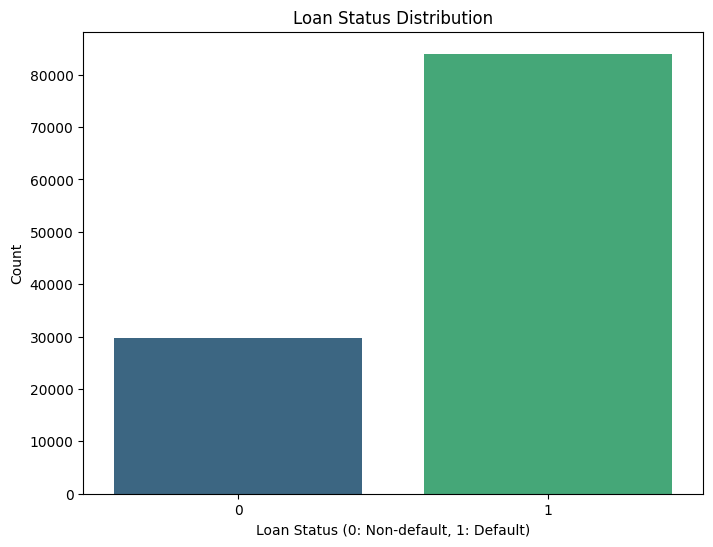

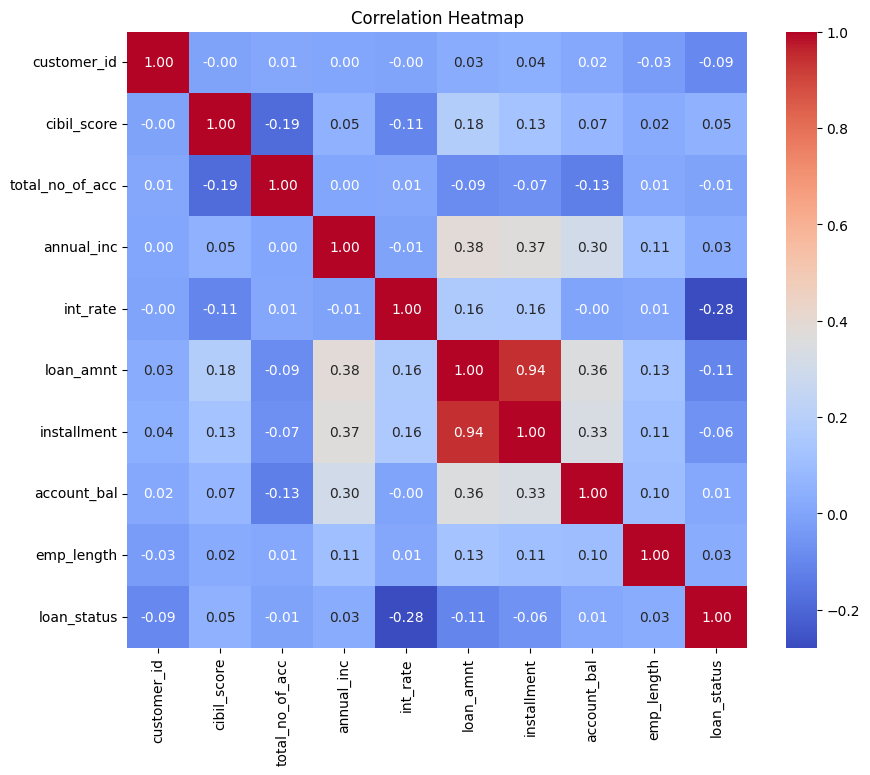

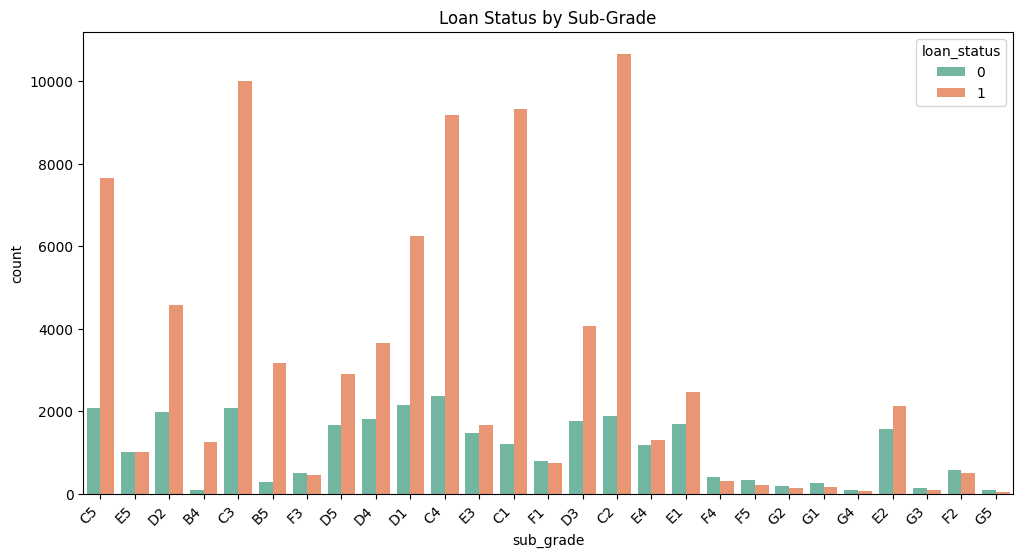

<ipython-input-4-c6f5e34d5c72>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=data, palette='muted')


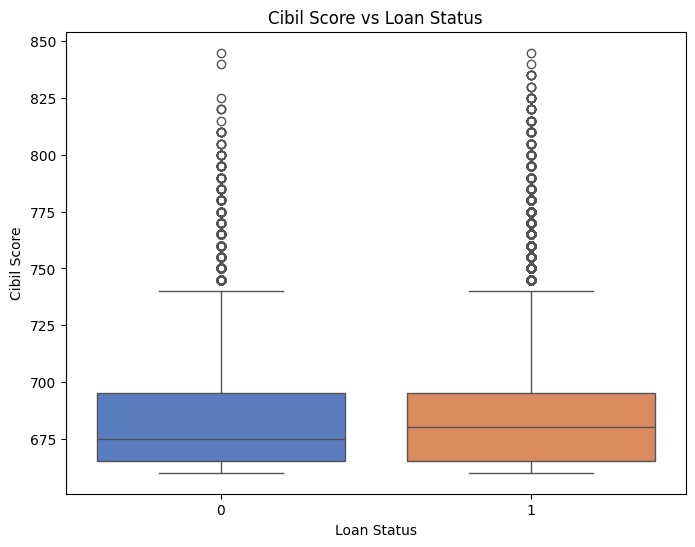

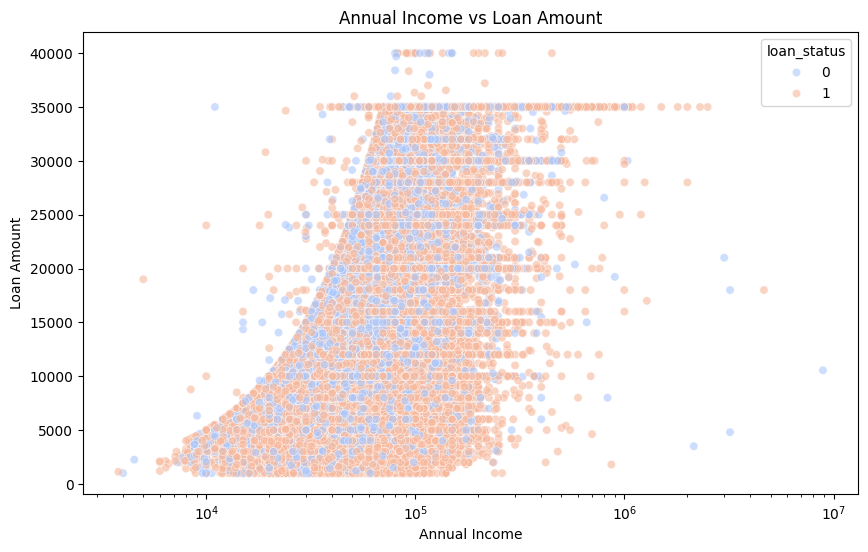

<ipython-input-4-c6f5e34d5c72>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='dti', data=data, palette='cool')


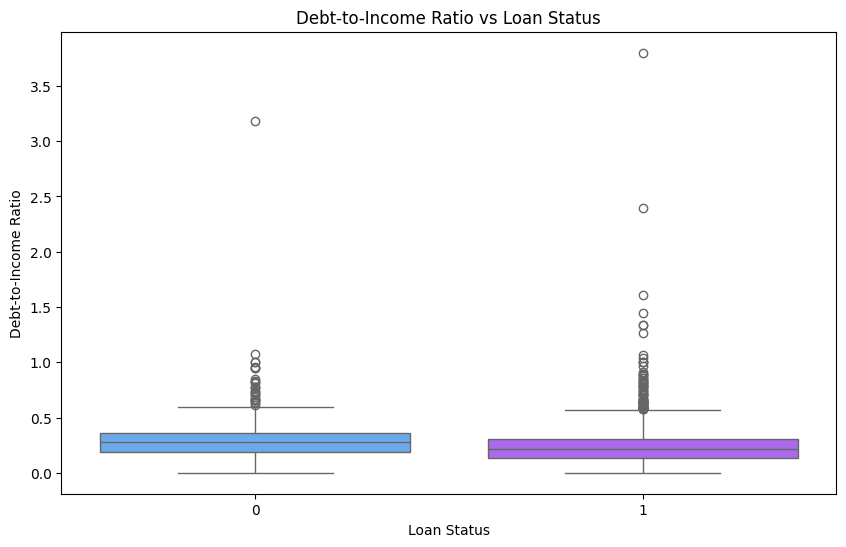

<ipython-input-4-c6f5e34d5c72>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='emp_length', data=data, palette='Set3')


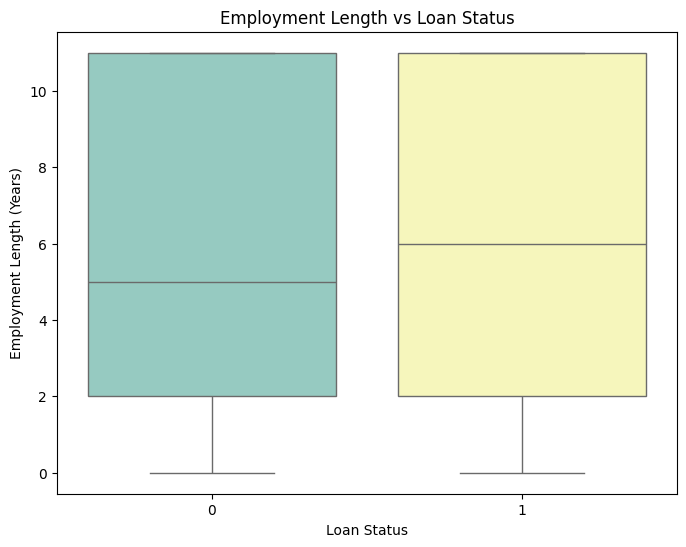

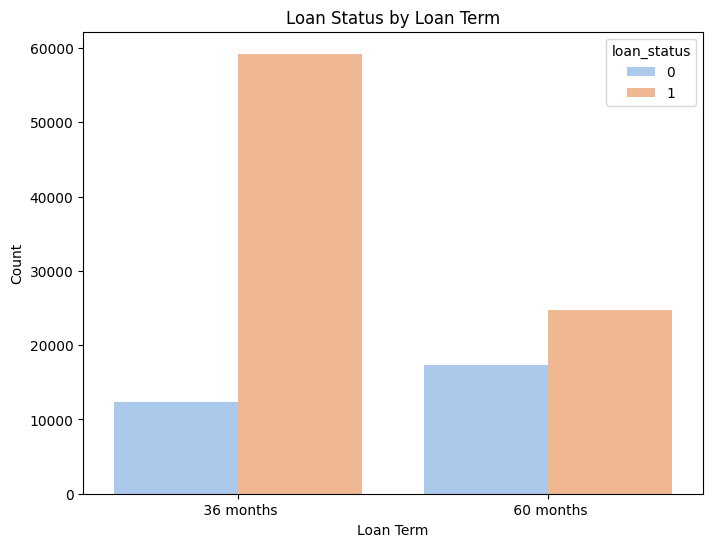

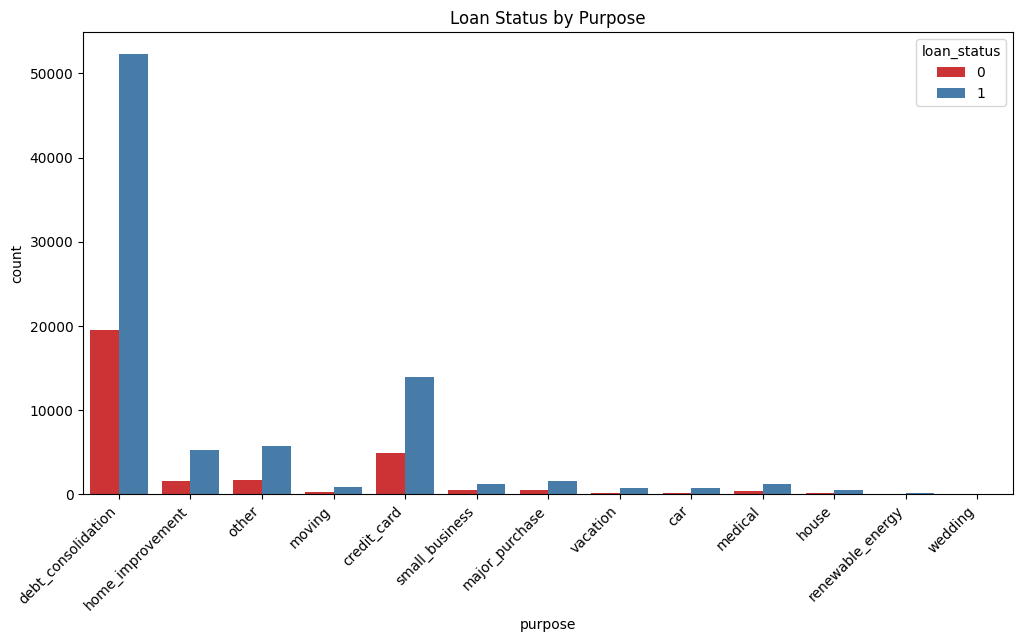

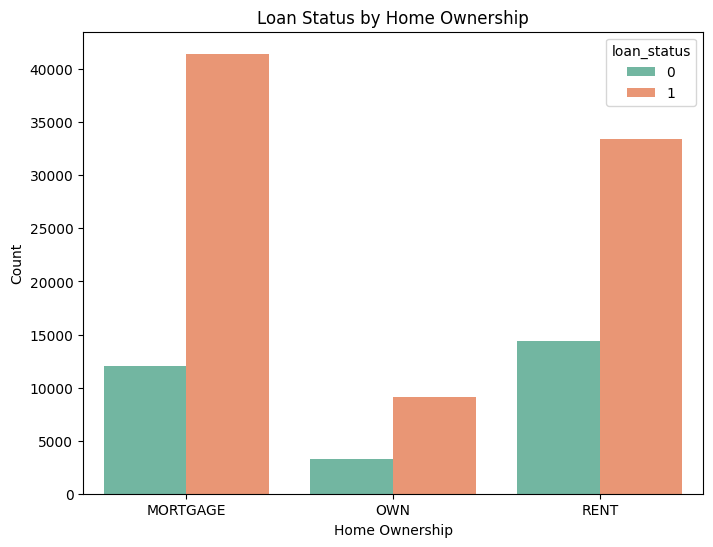

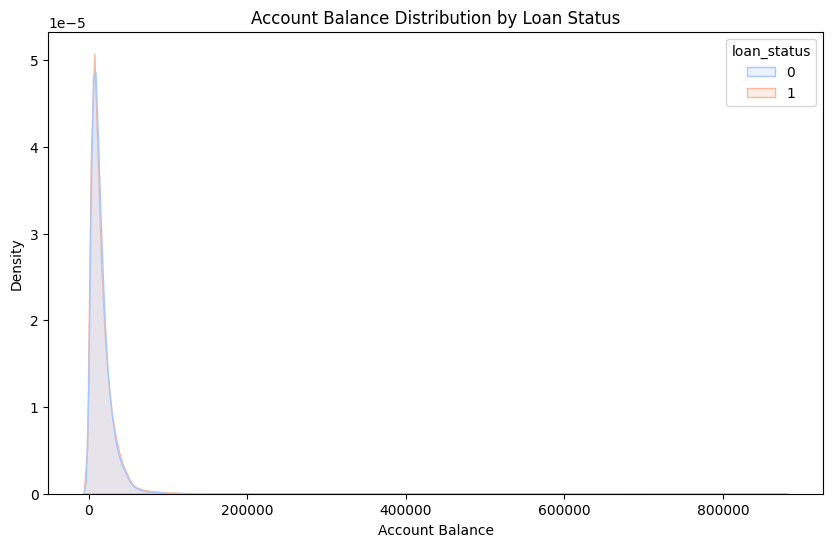

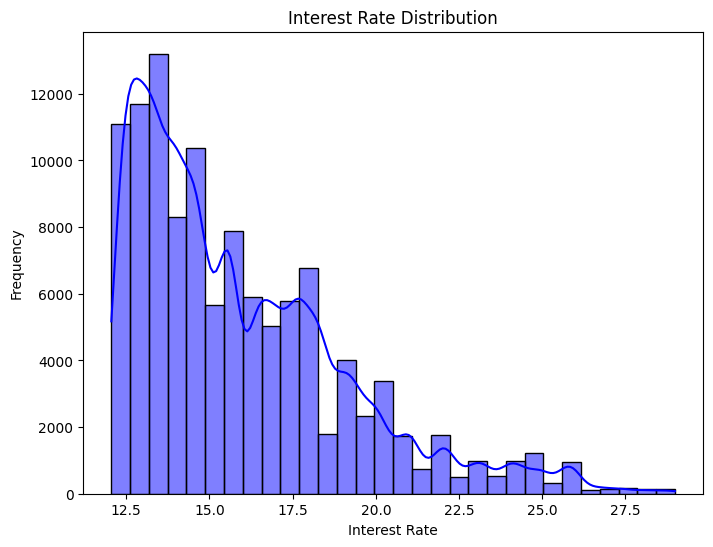

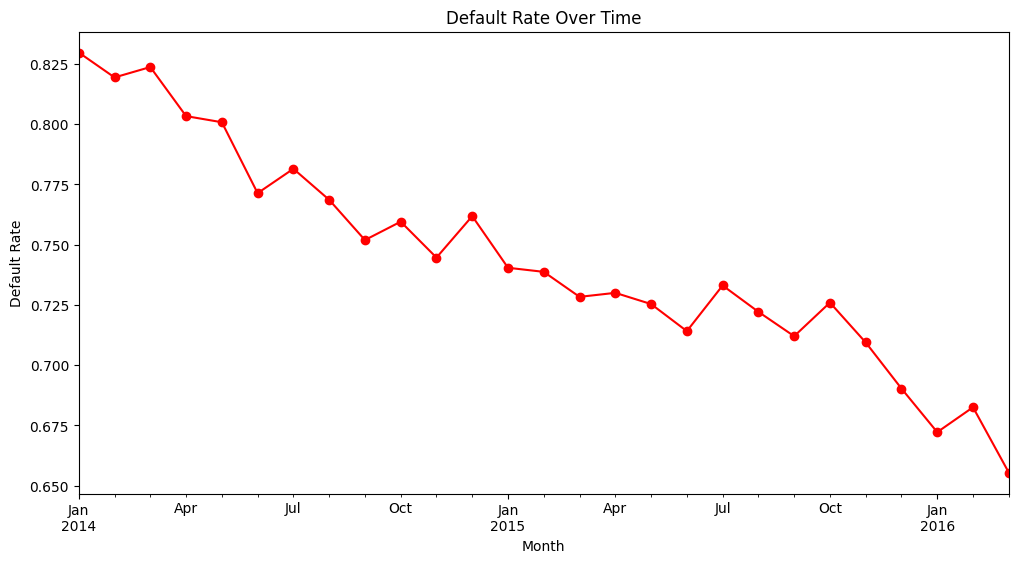

In [4]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook  # For reading .xlsx files

# --- Load Data ---
try:
    file_path = "train_data.xlsx"  # Replace with the correct file path
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print("Error: train_data.xlsx not found. Please ensure the file is in the same directory.")
    exit()

# --- Data Inspection ---
print("\nDataset Overview:\n")
print(data.head())
print("\nBasic Info:\n")
print(data.info())
print("\nSummary Statistics:\n")
print(data.describe())

# --- Missing Values ---
print("\nMissing Values:\n")
missing_values = data.isnull().sum()
print(missing_values)

# Handle missing values (if needed)
data['emp_length'].fillna(data['emp_length'].median(), inplace=True)

# --- Duplicates ---
print("\nDuplicate Rows:", data.duplicated().sum())

# --- Target Variable Analysis ---
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=data, palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0: Non-default, 1: Default)')
plt.ylabel('Count')
plt.show()

# --- Correlation Analysis ---
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# --- Feature Analysis ---
# 1. Sub-Grade vs Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(x='sub_grade', hue='loan_status', data=data, palette='Set2')
plt.title('Loan Status by Sub-Grade')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Cibil Score vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=data, palette='muted')
plt.title('Cibil Score vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

# 3. Annual Income vs Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=data, palette='coolwarm', alpha=0.6)
plt.title('Annual Income vs Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.xscale('log')
plt.show()

# 4. Debt-to-Income Ratio
# Create Debt-to-Income Ratio
data['dti'] = data['loan_amnt'] / data['annual_inc']

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=data, palette='cool')
plt.title('Debt-to-Income Ratio vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

# 5. Employment Length vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='emp_length', data=data, palette='Set3')
plt.title('Employment Length vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length (Years)')
plt.show()

# 6. Loan Term vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='term', hue='loan_status', data=data, palette='pastel')
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

# 7. Purpose of Loan vs Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=data, palette='Set1')
plt.title('Loan Status by Purpose')
plt.xticks(rotation=45, ha='right')
plt.show()

# 8. Home Ownership vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=data, palette='Set2')
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

# --- Advanced Insights ---
# 9. Account Balance vs Loan Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='account_bal', hue='loan_status', fill=True, common_norm=False, palette='coolwarm')
plt.title('Account Balance Distribution by Loan Status')
plt.xlabel('Account Balance')
plt.show()

# 10. Interest Rate Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['int_rate'], kde=True, bins=30, color='blue')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# 11. Time-Based Analysis (if transaction_date exists)
if 'transaction_date' in data.columns:
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])
    default_trend = data.groupby(data['transaction_date'].dt.to_period("M"))['loan_status'].mean()

    plt.figure(figsize=(12, 6))
    default_trend.plot(kind='line', marker='o', color='red')
    plt.title('Default Rate Over Time')
    plt.xlabel('Month')
    plt.ylabel('Default Rate')
    plt.show()

# --- Save Figures (Optional) ---
# Uncomment the below line to save all figures to a file
# plt.savefig('eda_plots.png')


In [13]:
# Handle missing values for all columns (if needed)
missing_values = data.isnull().sum()
print(missing_values)

# Fill missing values for all relevant columns
for column in missing_values.index:
    if missing_values[column] > 0:
        if data[column].dtype == 'object':  # For categorical columns
            data[column].fillna(data[column].mode()[0], inplace=True)  # Fill with mode
        else:  # For numerical columns
            data[column].fillna(data[column].median(), inplace=True)  # Fill with median


customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dti                    0
dtype: int64


**MODELLING**
- Model Encapsulation: Creates a class to manage and streamline the machine learning pipeline for loan default prediction.

- Pipeline Creation: Builds a preprocessing pipeline including scaling numerical features and one-hot encoding categorical features.

- Model Selection: Allows choosing between Logistic Regression and XGBoost classifiers.

- Data Loading and Preprocessing: Loads data, handles date features, and preprocesses it using the defined pipeline.

- Model Training and Evaluation: Trains the selected model and evaluates its performance using standard classification metrics (accuracy, precision, recall, F1-score).

- Model Explainability: Uses SHAP values to interpret model predictions and feature importance.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:39:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.60      0.31      0.41      5917
           1       0.79      0.93      0.86     16824

    accuracy                           0.77     22741
   macro avg       0.70      0.62      0.63     22741
weighted avg       0.74      0.77      0.74     22741

Accuracy: 0.7674
Precision: 0.7920
Recall: 0.9298
F1-score: 0.8554
Confusion Matrix:
 [[ 1808  4109]
 [ 1181 15643]]


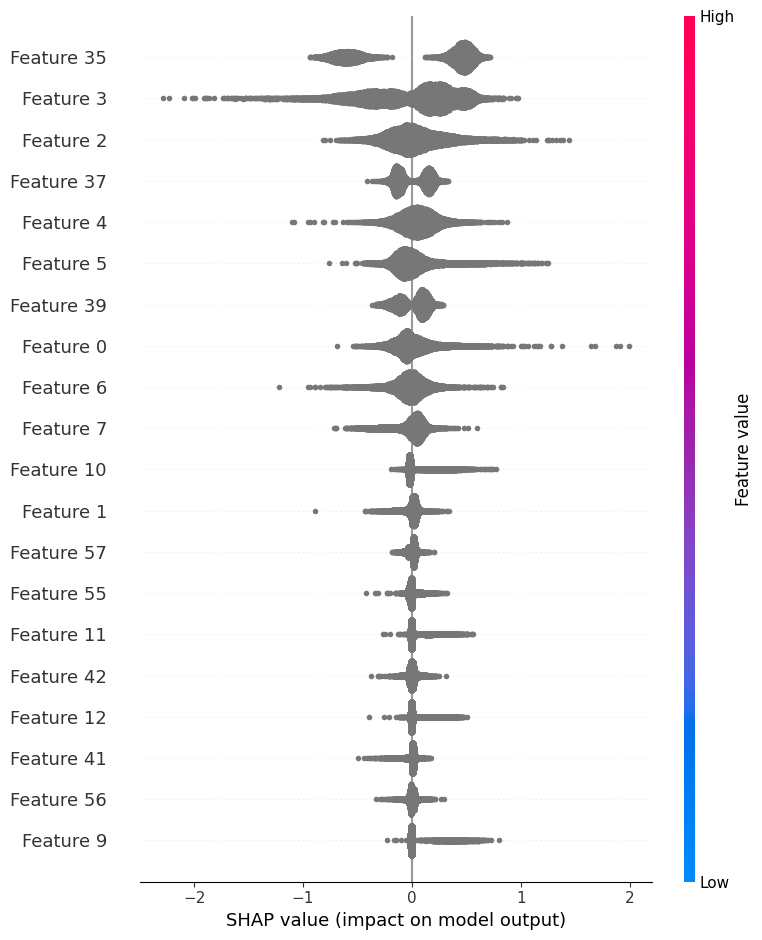

              precision    recall  f1-score   support

           0       0.61      0.27      0.38      5917
           1       0.79      0.94      0.86     16824

    accuracy                           0.77     22741
   macro avg       0.70      0.61      0.62     22741
weighted avg       0.74      0.77      0.73     22741

Accuracy: 0.7660
Precision: 0.7858
Recall: 0.9398
F1-score: 0.8560
Confusion Matrix:
 [[ 1607  4310]
 [ 1012 15812]]


(0.7659733520953345,
 0.7858065798628368,
 0.9398478364241559,
 0.8559519298435555)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import shap  # For SHAP values

# Class to encapsulate the model pipeline
class LoanDefaultModel:
    def __init__(self, model_type='xgboost'):  # Default to XGBoost
        self.model_type = model_type
        self.model = self._create_model(model_type)
        self.preprocessor = self._create_preprocessor()
        self.pipeline = Pipeline([('preprocessor', self.preprocessor), ('model', self.model)])

    def _create_model(self, model_type):
        """Choose model based on user selection."""
        if model_type == 'logistic':
            return LogisticRegression(max_iter=1000)  # Logistic Regression model
        elif model_type == 'xgboost':
            return XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)  # XGBoost model
        else:
            raise ValueError("Invalid model type. Choose 'logistic' or 'xgboost'.")

    def _create_preprocessor(self):
        """Create the preprocessing pipeline."""
        numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']
        categorical_features = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']

        # Numeric and categorical transformers
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])  # Scaling numeric features
        categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encoding categorical features

        preprocessor = ColumnTransformer(
            transformers=[('num', numeric_transformer, numerical_features),
                          ('cat', categorical_transformer, categorical_features)])
        return preprocessor

    def load(self, filename):
        """Load the dataset."""
        try:
            self.data = pd.read_excel(filename)
            # Handle 'transaction_date' conversion
            self.data['transaction_date'] = pd.to_datetime(self.data['transaction_date'])
            self.data['transaction_date'] = (self.data['transaction_date'] - self.data['transaction_date'].min()).dt.days
            # Drop irrelevant columns (e.g., 'customer_id')
            self.data = self.data.drop('customer_id', axis=1)

            # Handle missing values separately for numerical and categorical columns
            numerical_features = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']
            categorical_features = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']

            # Fill missing values in numerical columns with the median
            self.data[numerical_features] = self.data[numerical_features].fillna(self.data[numerical_features].median())

            # Fill missing values in categorical columns with the mode (most frequent value)
            for col in categorical_features:
                self.data[col] = self.data[col].fillna(self.data[col].mode()[0])

        except FileNotFoundError:
            print(f"Error: {filename} not found.")
            return None

    def preprocess(self):
        """Separate features and target variable."""
        X = self.data.drop('loan_status', axis=1)
        y = self.data['loan_status']
        return X, y

    def train(self, X_train, y_train):
        """Train the model."""
        self.pipeline.fit(X_train, y_train)

    def test(self, X_test, y_test):
        """Evaluate the model on the test set."""
        y_pred = self.pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        return accuracy, precision, recall, f1

    def predict(self, X):
        """Predict on new data."""
        return self.pipeline.predict(X)

    def explain(self, X):
        """Generate SHAP values for explainability."""
        # Apply preprocessing manually
        X_processed = self.preprocessor.transform(X)

        # Create a SHAP explainer using the trained model
        explainer = shap.Explainer(self.model)  # Use the model directly (XGBoost)
        shap_values = explainer(X_processed)

        # Visualize SHAP values using the correct plot function
        shap.summary_plot(shap_values, X_processed)  # Correct plot function


# Example usage:
model_xgb = LoanDefaultModel()  # XGBoost model
model_logreg = LoanDefaultModel(model_type='logistic')  # Logistic Regression model

# Load data and preprocess
model_xgb.load('train_data.xlsx')
X, y = model_xgb.preprocess()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate XGBoost
model_xgb.train(X_train, y_train)
model_xgb.test(X_test, y_test)
model_xgb.explain(X_test)  # SHAP explanation for XGBoost

# Train and evaluate Logistic Regression
model_logreg.load('train_data.xlsx')
X, y = model_logreg.preprocess()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_logreg.train(X_train, y_train)
model_logreg.test(X_test, y_test)


**XGBOOST SELECTION**

- High Performance: XGBoost consistently achieves high accuracy and F1-scores in classification tasks, especially with complex datasets.

- Robustness: It handles missing values and outliers effectively, requiring less pre-processing.

- Feature Importance: Provides built-in feature importance scores, aiding interpretability.

- Efficiency: Generally trains relatively quickly, even with large datasets.

- Flexibility: Supports various evaluation metrics and hyperparameter tuning for optimization.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import xgboost as xgb
from xgboost import plot_importance

# Load the datasets
df_train = pd.read_excel('/content/train_data.xlsx')
df_test = pd.read_excel('/content/test_data.xlsx')

# Feature Engineering: Target column is 'loan_status'
X_train = df_train.drop(columns=['loan_status'])
y_train = df_train['loan_status']
X_test = df_test.drop(columns=['loan_status'], errors='ignore')

# Convert 'transaction_date' to numeric (e.g., extract year and month)
X_train['transaction_date'] = pd.to_datetime(X_train['transaction_date'])
X_test['transaction_date'] = pd.to_datetime(X_test['transaction_date'])
X_train['transaction_year'] = X_train['transaction_date'].dt.year
X_train['transaction_month'] = X_train['transaction_date'].dt.month
X_test['transaction_year'] = X_test['transaction_date'].dt.year
X_test['transaction_month'] = X_test['transaction_date'].dt.month

# Drop the original 'transaction_date' column
X_train = X_train.drop(columns=['transaction_date'])
X_test = X_test.drop(columns=['transaction_date'])

# Convert categorical variables to numeric using OneHotEncoding
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

# Ensure the training and test data have the same columns (handle missing columns in test set)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Encode the target variable (loan_status)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_train, y_train)

# Predict on the test dataset
y_test_pred = model.predict(X_test)

# Add predictions to the test data
df_test['Predictions'] = label_encoder.inverse_transform(y_test_pred)

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=20, height=0.5)
plt.title('Feature Importance')
plt.show()

# Visualize predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, color='blue', label='Predicted Probabilities')
plt.xlabel('Predicted Probability of Default')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

# Save predictions
df_test[['customer_id', 'Predictions']].to_csv('loan_default_predictions.csv', index=False)
